In [68]:
import pandas as pd
import re

In [70]:
f = open('WhatsApp Chat with All the MAITians🔥.txt','r',encoding = 'utf-8')

In [71]:
data = f.read()

In [72]:
print(data)

7/6/22, 10:09 PM - Yuvraj: 👀
7/6/22, 10:09 PM - Pradumn: Viagra se insurance badhta hai size nhi🥲
7/6/22, 10:09 PM - Aniketh Verma: 👀👀
7/6/22, 10:09 PM - Pradumn: Indurance*
7/6/22, 10:09 PM - Aniketh Verma: E*
7/6/22, 10:09 PM - Varun Arora: nilanjan hamare liye hamesha Ameer aadmi rahega
7/6/22, 10:09 PM - Pranshu: Still wrong
7/6/22, 10:09 PM - Pranshu: But ok
7/6/22, 10:09 PM - Yuvraj: Viagra se thodi si length bad sakti h I read
7/6/22, 10:09 PM - Pradumn: Samajh jao
7/6/22, 10:09 PM - Yuvraj: Max erection capacity per le jata h
7/6/22, 10:09 PM - Varun Arora: wo road par aa jaye, bheek maange, footpath par jiye, par hame usse fir bhi paise maangenge aur Ameer kahenge
7/6/22, 10:09 PM - Pranshu: Billi ne sab saha hai
7/6/22, 10:09 PM - Pradumn: Length nhi badhata hai fully strech kar deta hai
7/6/22, 10:10 PM - Varun Arora: f
7/6/22, 10:10 PM - Pratyush: Bhai ye whatsapp directly last message pe kyun khulta hai ab
7/6/22, 10:10 PM - Yuvraj: Ha exactly, to tumhe lag sakta h pehle t

In [64]:
#pattern = '\d{1,2}/\d{1,2}/\d{2},\s\d{1,2}:\d{2}\s\w{2}\s-\s'

In [73]:
def date_time(s):
    pattern = '^([0-9]+)(\/)([0-9]+)(\/)([0-9]+), ([0-9]+):([0-9]+)[ ]?(AM|PM|am|pm)? -'
    result = re.match(pattern, s)
    if result:
        return True
    else:
        pattern = '\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{2}\s-\s'
        result = re.match(pattern, s)
        if result:
            return True
        else:
            return False

In [74]:
def getDatapoint(line):
    splitline = line.split(' - ')
    dateTime = splitline[0]
    date, time = dateTime.split(", ")
    message = " ".join(splitline[1:])
    splitmessage = message.split(": ")
    if splitmessage[1:]:
        author = splitmessage[0]
        message = " ".join(splitmessage[1:])
    else:
        author = 'group_notification'
        message = splitmessage[0]
    return date, time, author, message

In [75]:
data = []
conversation = 'WhatsApp Chat with All the MAITians🔥.txt'
fp=open(conversation,'r',encoding='utf-8');
fp.readline()
messageBuffer = []
date, time, user = None, None, None
while True:
    line = fp.readline()
    if not line:
        break
    line = line.strip()
    if date_time(line):
        if len(messageBuffer) > 0:
            data.append([date, time, user, ' '.join(messageBuffer)])
        messageBuffer.clear()
        date, time, user, message = getDatapoint(line)
        messageBuffer.append(message)
    else:
        messageBuffer.append(line)

In [76]:
df = pd.DataFrame(data, columns=["date", 'time', 'user', 'message'])
df['date'] = pd.to_datetime(df['date'])
df['time'] = pd.to_datetime(df['time'])
df.head()

,date,time,user,message
0,2022-07-06,2022-09-19 22:09:00,Pradumn,Viagra se insurance badhta hai size nhi🥲
1,2022-07-06,2022-09-19 22:09:00,Aniketh Verma,👀👀
2,2022-07-06,2022-09-19 22:09:00,Pradumn,Indurance*
3,2022-07-06,2022-09-19 22:09:00,Aniketh Verma,E*
4,2022-07-06,2022-09-19 22:09:00,Varun Arora,nilanjan hamare liye hamesha Ameer aadmi rahega


In [77]:
df['only_date'] = df['date'].dt.date
df['year'] = df['date'].dt.year
df['month_num'] = df['date'].dt.month
df['month'] = df['date'].dt.month_name()
df['day'] = df['date'].dt.day
df['day_name'] = df['date'].dt.day_name()
df['hour'] = df['time'].dt.hour
df['minute'] = df['time'].dt.minute

In [78]:
df.tail(10)

,date,time,user,message,only_date,year,month_num,month,day,day_name,hour,minute
39987,2022-09-18,2022-09-19 12:39:00,Nilanjan,are tu grp ka status bdl de bs,2022-09-18,2022,9,September,18,Sunday,12,39
39988,2022-09-18,2022-09-19 12:39:00,Nilanjan,kuch bhi dal de,2022-09-18,2022,9,September,18,Sunday,12,39
39989,2022-09-18,2022-09-19 12:39:00,Yuvraj,Status kya hota h grp ka?,2022-09-18,2022,9,September,18,Sunday,12,39
39990,2022-09-18,2022-09-19 12:39:00,Yuvraj,Description keh rha h?,2022-09-18,2022,9,September,18,Sunday,12,39
39991,2022-09-18,2022-09-19 12:39:00,Nilanjan,<Media omitted>,2022-09-18,2022,9,September,18,Sunday,12,39
39992,2022-09-18,2022-09-19 12:39:00,Nilanjan,hn wahi,2022-09-18,2022,9,September,18,Sunday,12,39
39993,2022-09-18,2022-09-19 12:40:00,Yuvraj,🥲,2022-09-18,2022,9,September,18,Sunday,12,40
39994,2022-09-18,2022-09-19 12:40:00,Yuvraj,Waah modiji waah,2022-09-18,2022,9,September,18,Sunday,12,40
39995,2022-09-18,2022-09-19 12:40:00,Nilanjan,me boomer,2022-09-18,2022,9,September,18,Sunday,12,40
39996,2022-09-18,2022-09-19 12:40:00,group_notification,Yuvraj changed the group description,2022-09-18,2022,9,September,18,Sunday,12,40


In [56]:
df.sample(20)

,date,time,user,message,only_date,year,month_num,month,day,day_name,hour,minute
10589,2020-04-03,2022-09-19 01:54:00,Miss Humiliated 🥰,Sala ptani kaha hi udd gyi,2020-04-03,2020,4,April,3,Friday,1,54
14260,2020-04-21,2022-09-19 21:03:00,Miss Humiliated 🥰,Acha acha,2020-04-21,2020,4,April,21,Tuesday,21,3
4103,2019-12-19,2022-09-19 00:30:00,Vineet Rajput,😘,2019-12-19,2019,12,December,19,Thursday,0,30
2260,2019-12-11,2022-09-19 23:00:00,Miss Humiliated 🥰,Apna aap hi chlra wo,2019-12-11,2019,12,December,11,Wednesday,23,0
6103,2019-12-30,2022-09-19 20:49:00,Vineet Rajput,are mtlb bhut harami smjhte honge,2019-12-30,2019,12,December,30,Monday,20,49
12474,2020-04-15,2022-09-19 13:16:00,Miss Humiliated 🥰,Uhi mugshot sa face hai🤣🤣🤣,2020-04-15,2020,4,April,15,Wednesday,13,16
13761,2020-04-17,2022-09-19 18:40:00,Miss Humiliated 🥰,🤣🤣🤣,2020-04-17,2020,4,April,17,Friday,18,40
21952,2020-07-27,2022-09-19 20:36:00,Miss Humiliated 🥰,Kr skta hai tu,2020-07-27,2020,7,July,27,Monday,20,36
27223,2020-09-02,2022-09-19 00:14:00,Miss Humiliated 🥰,Y,2020-09-02,2020,9,September,2,Wednesday,0,14
23756,2020-08-09,2022-09-19 05:28:00,Miss Humiliated 🥰,🤣😀😀abey wo,2020-08-09,2020,8,August,9,Sunday,5,28


In [54]:
image = df[df['message']=='<Media omitted>'].shape[0]
image

2959

In [31]:
df.value_counts()

KeyError: 'messages'

In [18]:
#messages = re.split(pattern, data)[1:]

In [19]:
#messages

In [20]:
#patterns ='\d\d/\d\d/\d\d,\s\d\d:\d\d:\d\d\s\w\w'
#patterns = '\d{1,2}/\d{1,2}/\d{2},\s\d{1,2}:\d{2}\s\w{2}'

In [21]:
#dates = re.findall(patterns, data)

In [22]:
#dates

In [41]:
words= []
for message in df['message']:
    words.extend(message.split())

In [42]:
len(words)

198152

In [43]:
image = df[df['message']=='<Media omitted>\n'].shape[0]
image

1200

In [44]:
pip install urlextract


Note: you may need to restart the kernel to use updated packages.


In [45]:
from urlextract import URLExtract
extractor = URLExtract()
urls = extractor.find_urls("Text with URLs. Let's have URL janlipovsky.cz as an example.")
urls

['janlipovsky.cz']

In [46]:
links = []
for message in df['message']:
    links.extend(extractor.find_urls(message))

In [47]:
len(links)

272

In [48]:
df

,date,users,message,year,month,day,hour,minute
0,2022-07-06 10:09:00,Yuvraj,👀\n,2022,July,6,10,9
1,2022-07-06 10:09:00,Pradumn,Viagra se insurance badhta hai size nhi🥲\n,2022,July,6,10,9
2,2022-07-06 10:09:00,Aniketh Verma,👀👀\n,2022,July,6,10,9
3,2022-07-06 10:09:00,Pradumn,Indurance*\n,2022,July,6,10,9
4,2022-07-06 10:09:00,Aniketh Verma,E*\n,2022,July,6,10,9
...,...,...,...,...,...,...,...,...
39994,2022-09-18 12:40:00,Yuvraj,🥲\n,2022,September,18,12,40
39995,2022-09-18 12:40:00,Yuvraj,Waah modiji waah\n,2022,September,18,12,40
39996,2022-09-18 12:40:00,Nilanjan,me boomer\n,2022,September,18,12,40
39997,2022-09-18 12:40:00,group notification,Yuvraj changed the group description\n,2022,September,18,12,40


In [49]:
x = df['users'].value_counts()

In [50]:
import matplotlib.pyplot as plt

In [51]:
name = x.index
count = x.values

([0, 1, 2, 3, 4, 5, 6, 7, 8], <a list of 9 Text xticklabel objects>)

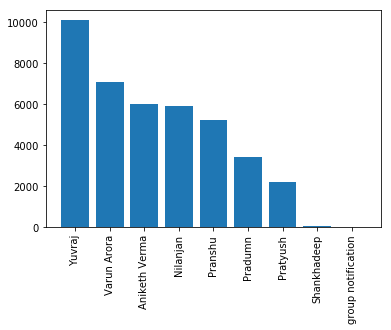

In [52]:
plt.bar(name, count)
plt.xticks(rotation= 'vertical')

In [53]:
round((df['users'].value_counts()/df.shape[0])*100,2).reset_index().rename(columns={'index':'users','users':'precent'})

,users,precent
0,Yuvraj,25.22
1,Varun Arora,17.65
2,Aniketh Verma,15.01
3,Nilanjan,14.82
4,Pranshu,13.03
5,Pradumn,8.52
6,Pratyush,5.55
7,Shankhadeep,0.15
8,group notification,0.06


In [54]:
words = []

for message in df['message']:
    words.extend(message.split())

In [55]:
pip install collections

Note: you may need to restart the kernel to use updated packages.


  Could not find a version that satisfies the requirement collections (from versions: )
No matching distribution found for collections


In [56]:
from collections import Counter
Counter(words).most_common(20)

[('hai', 5751),
 ('to', 4194),
 ('h', 3980),
 ('me', 2897),
 ('nhi', 2767),
 ('bhi', 2582),
 ('hi', 2076),
 ('se', 1856),
 ('\U0001f972', 1643),
 ('ka', 1635),
 ('tha', 1620),
 ('ke', 1575),
 ('ki', 1366),
 ('kya', 1304),
 ('ho', 1294),
 ('aur', 1229),
 ('<Media', 1200),
 ('omitted>', 1200),
 ('rha', 1160),
 ('ye', 1056)]

In [57]:
#remove group messages
#remove media omitted message
#remove stop words

In [58]:
temp = df[df['users'] != 'group notification']
temp = temp[temp['message'] != '<Media Omitted>\n']
temp = temp[temp['message'] != '<media omitted>']

In [59]:
from collections import Counter
Counter(words).most_common(20)

[('hai', 5751),
 ('to', 4194),
 ('h', 3980),
 ('me', 2897),
 ('nhi', 2767),
 ('bhi', 2582),
 ('hi', 2076),
 ('se', 1856),
 ('\U0001f972', 1643),
 ('ka', 1635),
 ('tha', 1620),
 ('ke', 1575),
 ('ki', 1366),
 ('kya', 1304),
 ('ho', 1294),
 ('aur', 1229),
 ('<Media', 1200),
 ('omitted>', 1200),
 ('rha', 1160),
 ('ye', 1056)]

In [60]:
temp

,date,users,message,year,month,day,hour,minute
0,2022-07-06 10:09:00,Yuvraj,👀\n,2022,July,6,10,9
1,2022-07-06 10:09:00,Pradumn,Viagra se insurance badhta hai size nhi🥲\n,2022,July,6,10,9
2,2022-07-06 10:09:00,Aniketh Verma,👀👀\n,2022,July,6,10,9
3,2022-07-06 10:09:00,Pradumn,Indurance*\n,2022,July,6,10,9
4,2022-07-06 10:09:00,Aniketh Verma,E*\n,2022,July,6,10,9
...,...,...,...,...,...,...,...,...
39993,2022-09-18 12:39:00,Nilanjan,hn wahi\n,2022,September,18,12,39
39994,2022-09-18 12:40:00,Yuvraj,🥲\n,2022,September,18,12,40
39995,2022-09-18 12:40:00,Yuvraj,Waah modiji waah\n,2022,September,18,12,40
39996,2022-09-18 12:40:00,Nilanjan,me boomer\n,2022,September,18,12,40


In [61]:
#remove stop words

In [62]:
f = open('stop_hinglish.txt', 'r')
stop_words = f.read()

In [63]:
words = []

for message in temp['message']:
    for word in message.lower().split():
        if word not in stop_words:
            words.append(word)
            
    

In [64]:
from collections import Counter
Counter(words).most_common(20)

[('\U0001f972', 1643),
 ('<media', 1200),
 ('omitted>', 1200),
 ('gya', 392),
 ('nilanjan', 384),
 ('damn', 351),
 ('ayo', 310),
 ('varun', 299),
 ('hn', 286),
 ('hehe', 257),
 ('kaam', 255),
 ('shyd', 254),
 ('baat', 250),
 ('+1', 232),
 ('saal', 230),
 ('zyada', 230),
 ('job', 220),
 ('null', 213),
 ('@917303692979', 211),
 ('test', 206)]

In [65]:
    most_common_df = pd.DataFrame(Counter(words).most_common(20))
    most_common_df= most_common_df.rename(columns={0:'words',1:'occurences '})

In [66]:
most_common_df

,words,occurences
0,🥲,1643
1,<media,1200
2,omitted>,1200
3,gya,392
4,nilanjan,384
5,damn,351
6,ayo,310
7,varun,299
8,hn,286
9,hehe,257


In [67]:
pip install emoji

  Running setup.py bdist_wheel for emoji: started
  Running setup.py bdist_wheel for emoji: finished with status 'done'
  Stored in directory: C:\Users\nilan\AppData\Local\pip\Cache\wheels\24\3d\de\ab85cf493a0d0adfb0b94e006c9b7da5989945037a78e32bda
Successfully built emoji
Note: you may need to restart the kernel to use updated packages.


In [68]:
import emoji

In [70]:
emojis = []
for message in df['message']:
    emojis.extend([c for c in message if c in emoji.distinct_emoji_list(message)])

In [73]:
emoji_df = pd.DataFrame(Counter(emojis).most_common(len(Counter(emojis))))

In [74]:
emoji_df = emoji_df.rename(columns= {0:'Emojis', 1: 'Occurences'})

In [75]:
emoji_df

,Emojis,Occurences
0,🥲,3708
1,😂,1150
2,👀,442
3,📈,130
4,🤡,82
...,...,...
97,💅,1
98,🚗,1
99,🥺,1
100,🍿,1


In [76]:
df['month_num'] = df['date'].dt.month

In [80]:
timeline = df.groupby(['year','month_num','month']).count()['message'].reset_index()

In [81]:
timeline

,year,month_num,month,message
0,2022,7,July,12780
1,2022,8,August,17793
2,2022,9,September,9426


In [82]:
time = []
for i in range(timeline.shape[0]):
    time.append(timeline['month'][i] + "-" + str(timeline['year'][i]))

In [84]:
timeline['time'] = time

In [85]:
timeline

,year,month_num,month,message,time
0,2022,7,July,12780,July-2022
1,2022,8,August,17793,August-2022
2,2022,9,September,9426,September-2022


<function matplotlib.pyplot.show(*args, **kw)>

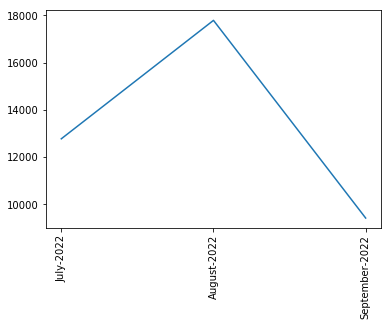

In [87]:
plt.plot(timeline['time'],timeline['message'])
plt.xticks(rotation='vertical')
plt.show

In [88]:
df['only_date'] = df['date'].dt.date

In [95]:
daily_timeline = df.groupby('only_date').count()['message'].reset_index()

(array([738351., 738365., 738368., 738382., 738396., 738399., 738413.]),
 <a list of 7 Text xticklabel objects>)

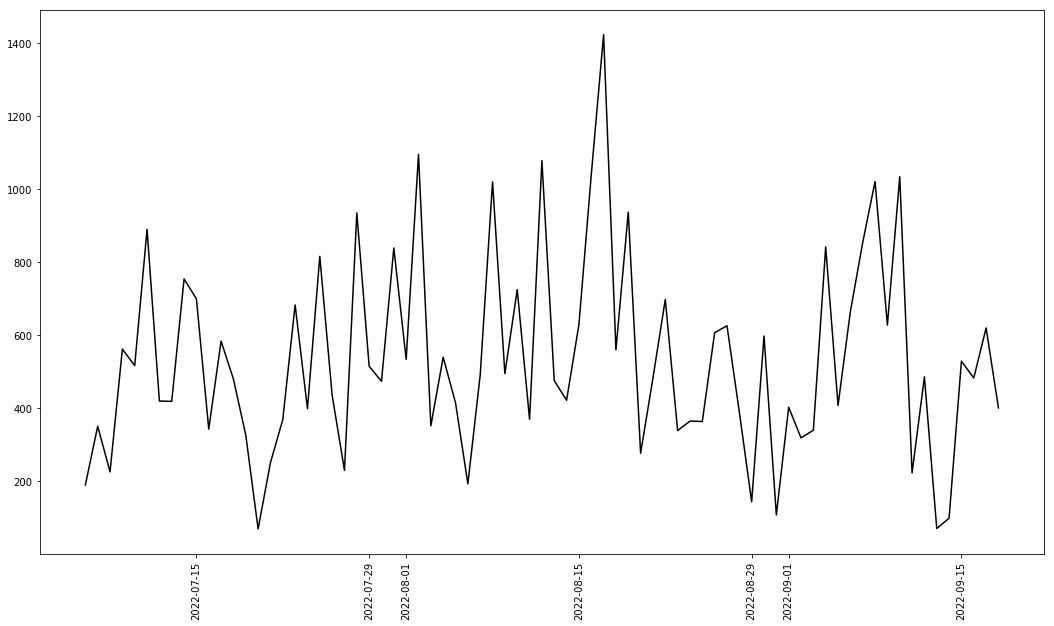

In [100]:
plt.figure(figsize =(18,10))
plt.plot(daily_timeline['only_date'],daily_timeline['message'], color = 'black')
plt.xticks(rotation='vertical')


In [101]:
df.head()

,date,users,message,year,month,day,hour,minute,month_num,only_date
0,2022-07-06 10:09:00,Yuvraj,👀\n,2022,July,6,10,9,7,2022-07-06
1,2022-07-06 10:09:00,Pradumn,Viagra se insurance badhta hai size nhi🥲\n,2022,July,6,10,9,7,2022-07-06
2,2022-07-06 10:09:00,Aniketh Verma,👀👀\n,2022,July,6,10,9,7,2022-07-06
3,2022-07-06 10:09:00,Pradumn,Indurance*\n,2022,July,6,10,9,7,2022-07-06
4,2022-07-06 10:09:00,Aniketh Verma,E*\n,2022,July,6,10,9,7,2022-07-06


In [103]:
df['day_name']=df['date'].dt.day_name()

In [104]:
df['day_name'].value_counts()

Friday       6277
Monday       6105
Thursday     6078
Saturday     5628
Sunday       5591
Tuesday      5485
Wednesday    4835
Name: day_name, dtype: int64

In [108]:
period = []
for hour in df[['day_name', 'hour']]['hour']:
    if hour == 23:
        period.append(str(hour) + "-" + str('00'))
    elif hour == 0:
        period.append(str('00') + "-" + str(hour + 1))
    else:
        period.append(str(hour) + "-" + str(hour + 1))
    

In [109]:
df['period'] = period

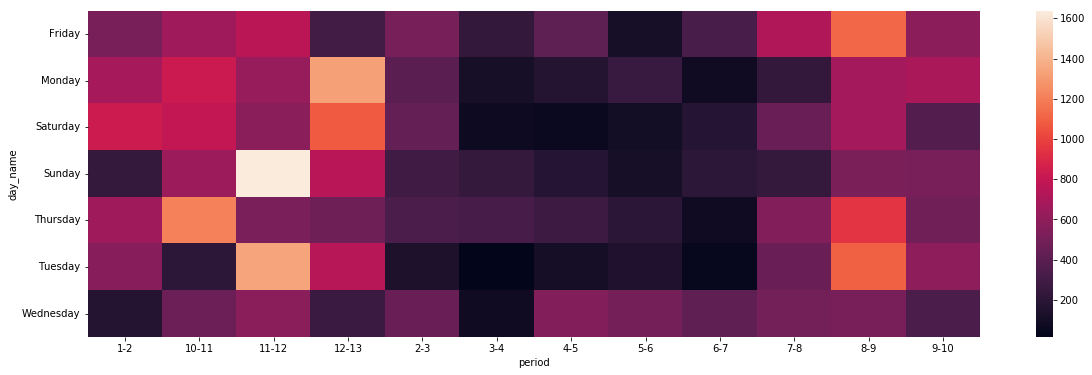

In [118]:
import seaborn as sns
plt.figure(figsize = (20,6))
sns.heatmap(df.pivot_table(index = 'day_name', columns='period', values='message', aggfunc='count').fillna(0))
plt.yticks(rotation='horizontal')
plt.show()